## confusion metrics
## precision - what % of positive pediction made were correct

    - In terms of math : precision = True positive / (True positive + False Positive)
    
## Recall - What % of Actual positive values were correctly classified by your classifer

    - In terms of math : Recall = True positive / (True positive + False Negative)
    
## F1- Score 

    - It is convenient to combine the performance of a classifier(precision and recall) into a single matric called the F1           Score.
    - F1-Score is the harmonic mean of precision and recall
    - In terms of math : F1-Score = (2*Precision*Recall) / (Precision+Recall)
    
    - High F1-score  --->>> means high precision and high Recall
    - Low F1-score   --->>> means low precision  or low Recall 

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [2]:
x,y = mnist['data'],mnist['target']

In [3]:
%matplotlib inline

In [4]:
x_train, x_test = x[:60000], x[60000:]
y_train, y_test = y[:60000], y[60000:]

import numpy as np
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [5]:
y_train = y_train.astype(np.int8)
y_test  = y_test.astype(np.int8)

y_train_2 = (y_train==2)
print(y_train_2)

y_test_2 = (y_test==2)
print(y_test)

[False False  True ... False False False]
[7 2 1 ... 4 5 6]


In [6]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(tol = 0.1 , solver='lbfgs') # we added tollerance = 0.1  because without that it take lots of times to run
clf.fit(x_train, y_train_2)

C:\Users\Bhargav Patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.1, verbose=0,
                   warm_start=False)

In [7]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")
a.mean()

C:\Users\Bhargav Patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Bhargav Patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Bhargav Patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9779333333333332

In [8]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, x_train, y_train_2, cv=3)
y_train_pred

C:\Users\Bhargav Patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Bhargav Patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Bhargav Patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


array([False, False,  True, ..., False, False, False])

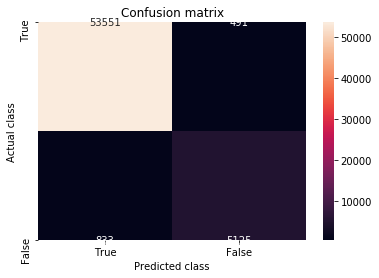

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
LABELS = ['True','False']  # just to undersatnd
conf_matrix = confusion_matrix(y_train_2, y_train_pred)
sns.heatmap(conf_matrix, xticklabels = LABELS,yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix") 
plt.ylabel('Actual class') 
plt.xlabel('Predicted class') 
plt.show() 

In [13]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_2, y_train_pred)

0.9125712250712251

In [14]:
recall_score(y_train_2, y_train_pred)

0.860187982544478

## F1-score

In [15]:
from sklearn.metrics import f1_score
f1_score(y_train_2, y_train_pred)

0.8856056678762745

## Precision recall curve

In [16]:
from sklearn.metrics import precision_recall_curve

In [17]:
# to get threshould
y_scores = cross_val_predict(clf, x_train, y_train_2, cv=3, method="decision_function")
y_scores

C:\Users\Bhargav Patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Bhargav Patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Bhargav Patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


array([ -9.91061189, -11.03528893,   5.9854072 , ..., -19.09848936,
        -5.87534956,  -4.08601958])

In [18]:
precisions, recalls, thresholds = precision_recall_curve(y_train_2, y_scores)

In [19]:
precisions

array([0.10110129, 0.10108603, 0.10108775, ..., 1.        , 1.        ,
       1.        ])

In [20]:
recalls

array([1.00000000e+00, 9.99832158e-01, 9.99832158e-01, ...,
       3.35683115e-04, 1.67841558e-04, 0.00000000e+00])

In [21]:
thresholds

array([-24.58569041, -24.5819482 , -24.57261647, ...,  19.05000104,
        20.12014866,  20.33227649])

## PLoatting precision recall curve

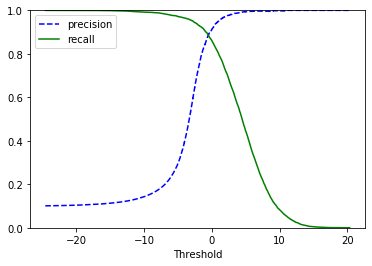

In [22]:
import matplotlib.pyplot as plt
plt.plot(thresholds, precisions[:-1], "b--", label="precision")
plt.plot(thresholds, recalls[:-1], "g-", label="recall")
plt.xlabel("Threshold")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()